In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV gerado anteriormente
df = pd.read_csv("pesquisa_industrial.csv")

# Certificar-se de que a coluna 'Mês' é do tipo string
df['Mês'] = df['Mês'].astype(str)

# Criar uma coluna com Ano-Mês para facilitar o eixo X
df['Ano-Mês'] = df['Ano'].astype(str) + '-' + df['Mês'].str.zfill(2)

# Filtrar uma categoria específica para exemplo (opcional)
categoria_especifica = "Categoria Desconhecida"  # Substitua pelo nome desejado
df_filtrado = df[df['Categoria'] == categoria_especifica]

C:\Users\biboy\AppData\Local\Temp\ipykernel_19592\3897019378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Ano', y='Valor Índice', palette='bright')


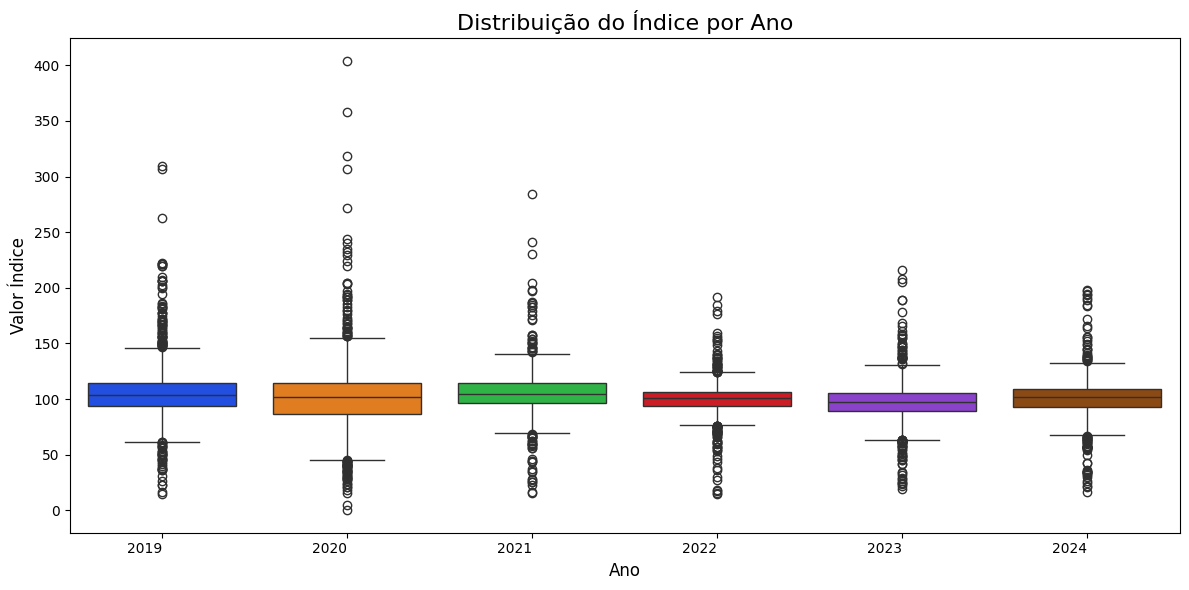

In [38]:
# Gráfico de Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Ano', y='Valor Índice', palette='bright')
plt.title("Distribuição do Índice por Ano", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Valor Índice", fontsize=12)
plt.xticks(rotation=360, ha='right')
plt.tight_layout()
plt.show()

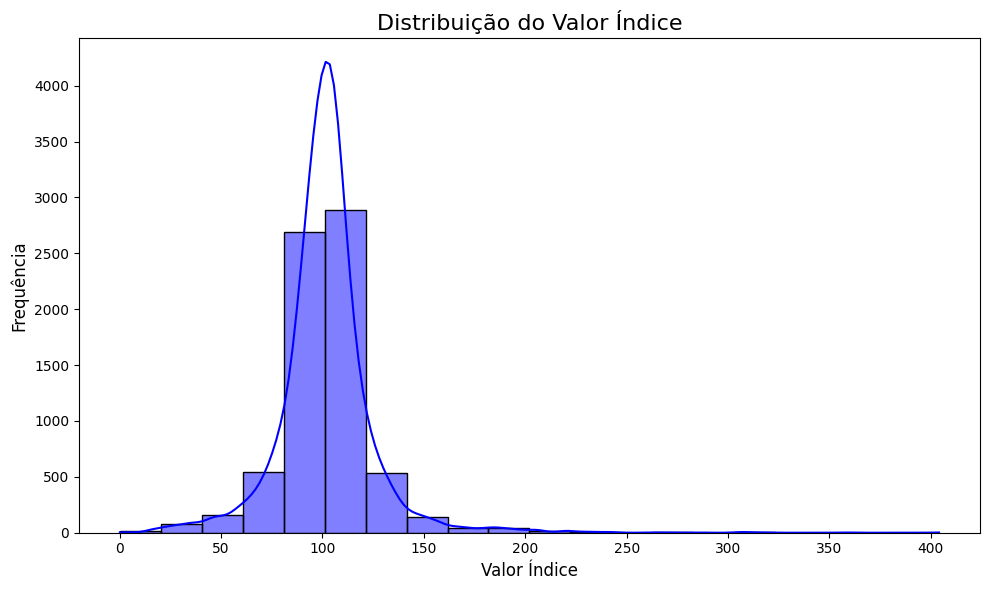

In [14]:
# Gráfico de Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Valor Índice', bins=20, kde=True, color='blue')
plt.title("Distribuição do Valor Índice", fontsize=16)
plt.xlabel("Valor Índice", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.tight_layout()
plt.show()


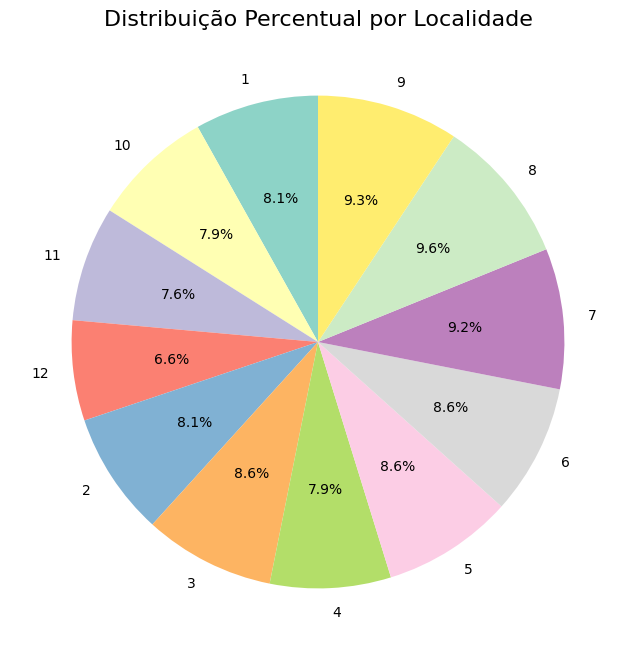

In [39]:
# Soma total do índice por localidade
soma_por_localidade = df.groupby('Mês')['Valor Índice'].sum()

# Gráfico de Pizza
plt.figure(figsize=(8, 8))
soma_por_localidade.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Distribuição Percentual por Localidade", fontsize=16)
plt.ylabel("")  # Remove o rótulo do eixo Y
plt.show()


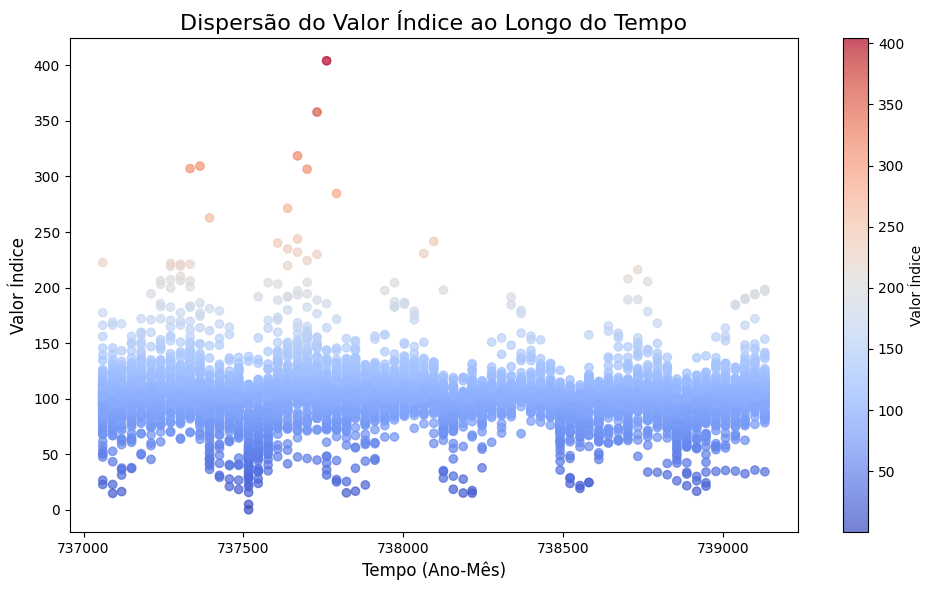

In [17]:
# Converter Ano-Mês em formato numérico para o scatter
df['Ano-Mês Numérico'] = pd.to_datetime(df['Ano-Mês'], format='%Y-%m').map(lambda x: x.toordinal())

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Ano-Mês Numérico'], df['Valor Índice'], alpha=0.7, c=df['Valor Índice'], cmap='coolwarm')
plt.colorbar(label='Valor Índice')
plt.title("Dispersão do Valor Índice ao Longo do Tempo", fontsize=16)
plt.xlabel("Tempo (Ano-Mês)", fontsize=12)
plt.ylabel("Valor Índice", fontsize=12)
plt.tight_layout()
plt.show()


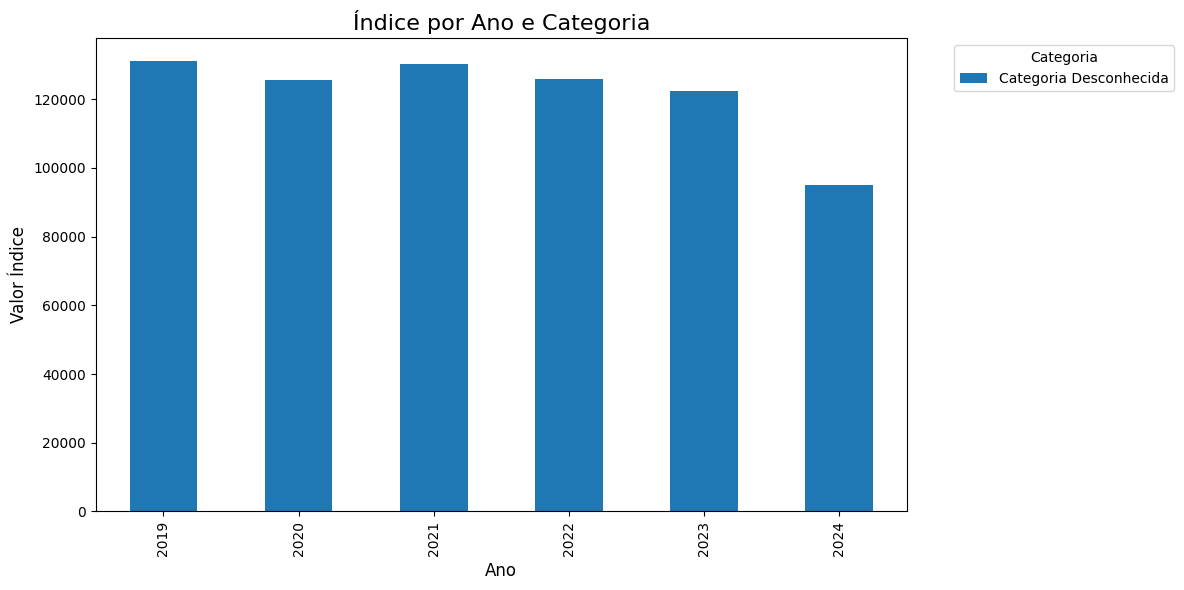

In [18]:
# Agregação por Ano e Categoria
df_barras = df.groupby(['Ano', 'Categoria'])['Valor Índice'].sum().unstack()

# Gráfico de Barras Empilhadas
df_barras.plot(kind='bar', stacked=True, figsize=(12, 6), cmap="tab20")
plt.title("Índice por Ano e Categoria", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Valor Índice", fontsize=12)
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


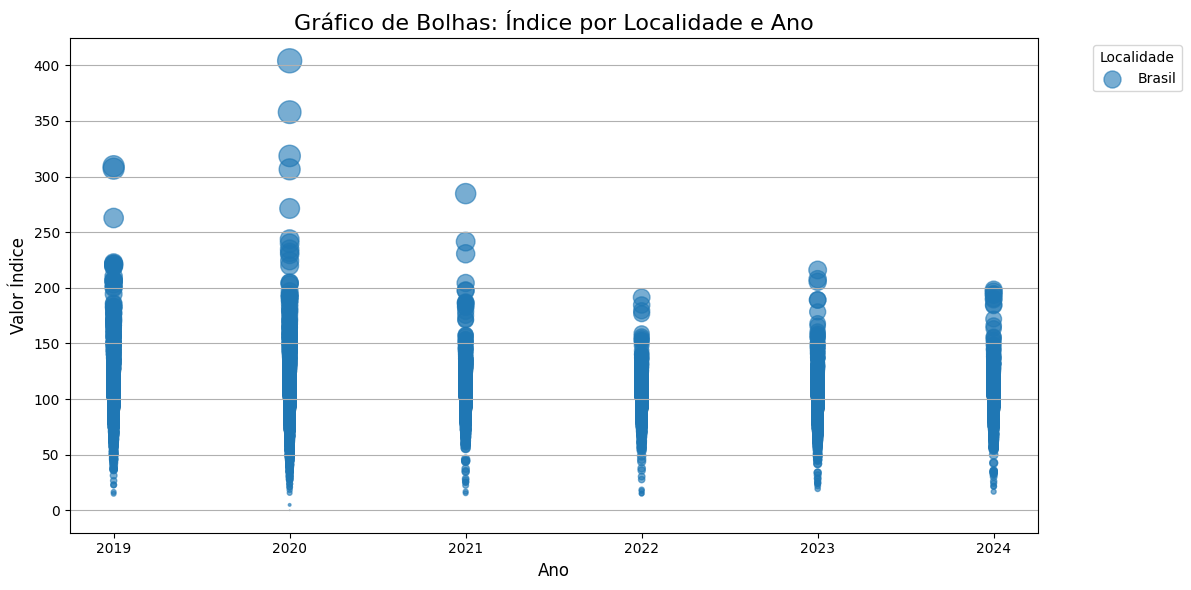

In [69]:
# Adicionar tamanho relativo para bolhas
df['Tamanho Bolha'] = df['Valor Índice'] / df['Valor Índice'].max() * 300

plt.figure(figsize=(12, 6))
for localidade in df['Localidade'].unique():
    df_local = df[df['Localidade'] == localidade]
    plt.scatter(df_local['Ano'], df_local['Valor Índice'], s=df_local['Tamanho Bolha'], alpha=0.6, label=localidade)

plt.title("Gráfico de Bolhas: Índice por Localidade e Ano", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Valor Índice", fontsize=12)
plt.legend(title="Localidade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


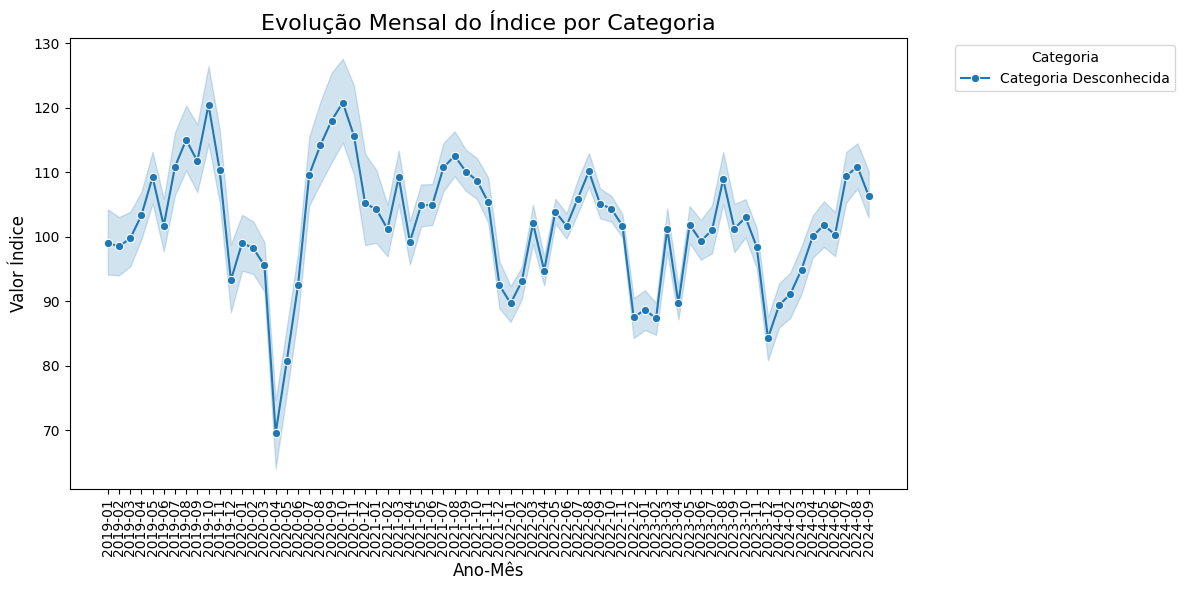

In [41]:
# Evolução Temporal do Índice - Gráfico de Linha (Mensal)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Ano-Mês', y='Valor Índice', hue='Categoria', marker='o')
plt.title("Evolução Mensal do Índice por Categoria", fontsize=16)
plt.xlabel("Ano-Mês", fontsize=12)
plt.ylabel("Valor Índice", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

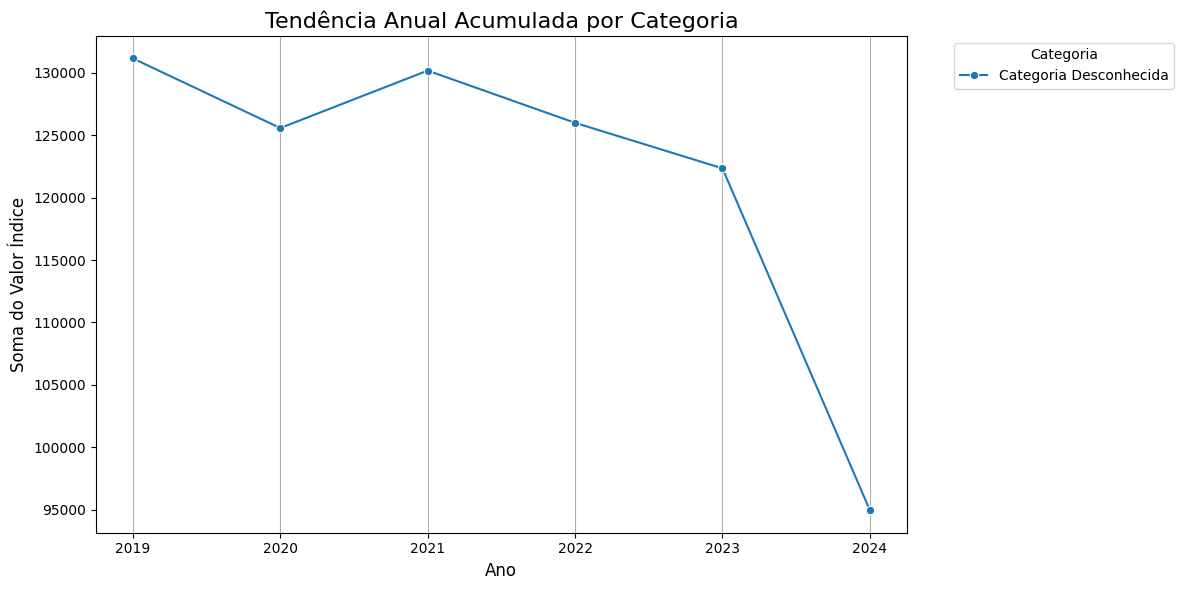

In [68]:
df_ano_acumulado = df.groupby(['Ano', 'Categoria'])['Valor Índice'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ano_acumulado, x='Ano', y='Valor Índice', hue='Categoria', marker='o')
plt.title("Tendência Anual Acumulada por Categoria", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Soma do Valor Índice", fontsize=12)
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x')  # Configurar a grade para mostrar apenas linhas verticais
plt.show()


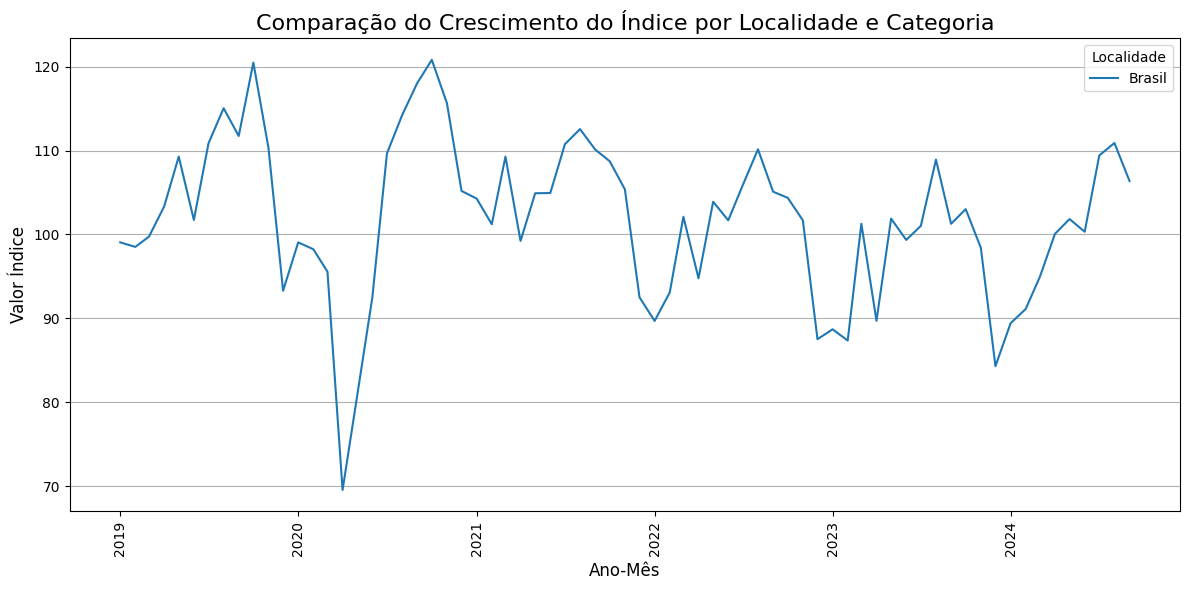

In [60]:
df_comparacao = df.pivot_table(index='Ano-Mês', columns='Localidade', values='Valor Índice', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comparacao)
plt.title("Comparação do Crescimento do Índice por Localidade e Categoria", fontsize=16)
plt.xlabel("Ano-Mês", fontsize=12)
plt.ylabel("Valor Índice", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')  # Configurar a grade para mostrar apenas linhas horizontais
plt.show()


C:\Users\biboy\AppData\Local\Temp\ipykernel_19592\3993537883.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_2021['Valor Índice YOY'] = df_2021.groupby('Categoria')['Valor Índice'].pct_change(periods=12) * 100
C:\Users\biboy\AppData\Local\Temp\ipykernel_19592\3993537883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Valor Índice YOY'] = df_2021.groupby('Categoria')['Valor Índice'].pct_change(periods=12) * 100


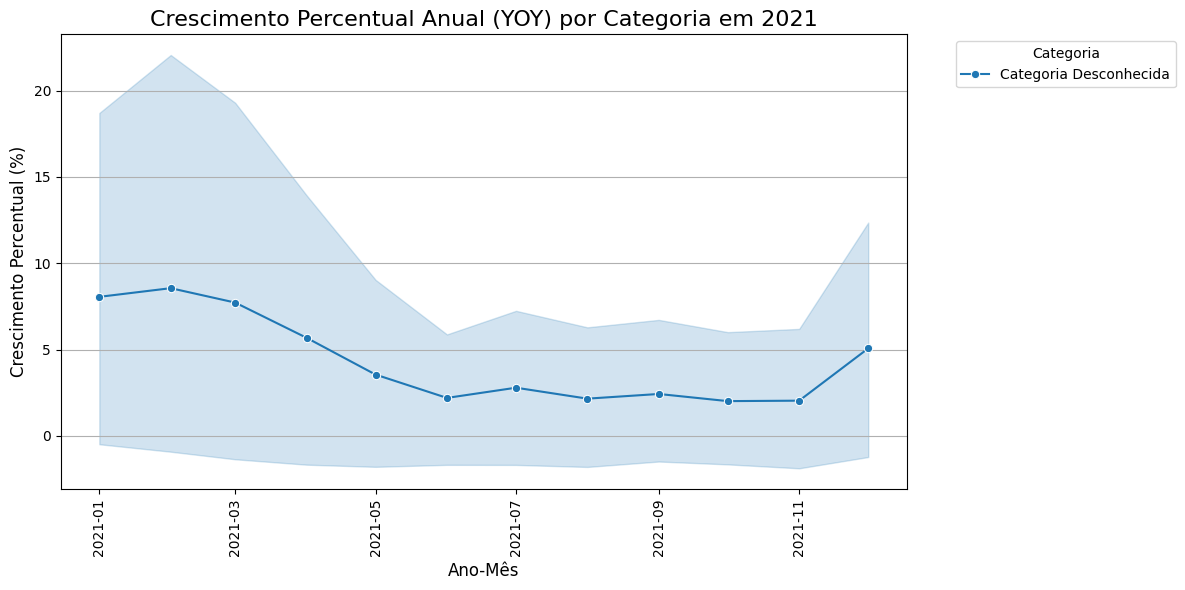

In [63]:
# Filtrar os dados para incluir apenas o ano de 2021
df_2021 = df[df['Ano-Mês'].dt.year == 2021]

# Calcular o crescimento percentual YOY para 2021
df_2021['Valor Índice YOY'] = df_2021.groupby('Categoria')['Valor Índice'].pct_change(periods=12) * 100

# Plotar o gráfico de linha para o crescimento percentual anual (YOY) de 2021
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2021, x='Ano-Mês', y='Valor Índice YOY', hue='Categoria', marker='o')
plt.title("Crescimento Percentual Anual (YOY) por Categoria em 2021", fontsize=16)
plt.xlabel("Ano-Mês", fontsize=12)
plt.ylabel("Crescimento Percentual (%)", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')  # Configurar a grade para mostrar apenas linhas horizontais
plt.show()
